1. What is Detectron2 and how does it differ from previous object detection
frameworks?

Detectron2 is an advanced object detection and segmentation framework developed by Facebook AI Research (FAIR). It is the successor to the original Detectron and is built entirely on PyTorch, offering improved flexibility, modularity, and performance. Detectron2 supports a wide range of computer vision tasks, including object detection, instance segmentation, panoptic segmentation, and keypoint detection.

Features:-

PyTorch-based Architecture: Unlike its predecessor, which was built on Caffe2, Detectron2 leverages PyTorch’s dynamic computation graph, enabling easier debugging and customization.

Modular and Extensible Design: It allows users to easily integrate custom backbones, layers, datasets, and model components, making it ideal for research and experimentation.

Support for State-of-the-Art Models: Implements popular architectures such as Faster R-CNN, Mask R-CNN, RetinaNet, and DensePose.

High Performance: Detectron2 is optimized for distributed training and inference, providing faster execution on GPUs and multi-node systems.

Dataset Compatibility: It supports standard datasets like COCO, LVIS, Cityscapes, and can be extended to custom datasets.

Comprehensive API: Offers simple Python interfaces for model training, evaluation, and deployment, ensuring ease of use.

Deployment Flexibility: Models can be exported to TorchScript or ONNX, facilitating deployment in production environments.

Differences from Previous Frameworks

Framework: Detectron used Caffe2; Detectron2 uses PyTorch, enabling dynamic computation.

Configuration: Detectron2 features a modern and simplified configuration system.

Speed and Efficiency: Detectron2 has improved data loading, parallelization, and GPU utilization.

Extensibility: Detectron2’s modular structure allows easier integration of custom components.

Community Support: A large and active community contributes regular updates, tutorials, and model repositories.

Detectron2 is a powerful, flexible, and efficient framework that sets a new standard for computer vision research and deployment. Its PyTorch integration, modular architecture, and production readiness make it the preferred choice for modern object detection tasks.

2. Explain the process and importance of data annotation when working with
Detectron2.

Data annotation is the process of labeling images with relevant information so that a machine learning model can learn to recognize objects, boundaries, or features. In Detectron2, annotation forms the foundation of supervised learning, where models rely on accurately labeled data to detect and classify objects. The quality of annotations directly influences model accuracy and performance.

Process of Data Annotation

Dataset Collection:
Gather a diverse set of images representing the objects and scenarios the model should learn from. Diversity helps improve generalization.

Annotation Tools:
Use annotation tools such as LabelMe, CVAT, LabelImg, or makesense.ai to mark object boundaries and assign labels (class names). These tools export data in formats like COCO JSON or Pascal VOC XML, which Detectron2 can read.

Types of Annotations:

Bounding Boxes: Define rectangular regions around objects (for detection tasks).

Polygons or Masks: Outline precise object shapes (for instance segmentation).

Keypoints: Mark specific points (for human pose estimation).

Class Labels: Assign a class name or ID to each annotated object.

Data Conversion:
Convert annotations into COCO-style JSON format or write a custom dataset loader using Detectron2’s DatasetCatalog and MetadataCatalog.

Validation:
Review annotations for consistency and accuracy. Incorrect or missing labels can lead to poor model performance.

Importance of Data Annotation

Model Accuracy: High-quality annotations ensure precise detection and classification.

Reduced Bias: Consistent labeling minimizes class imbalance and dataset bias.

Task Adaptation: Enables Detectron2 to handle various tasks like detection, segmentation, and keypoint estimation.

Training Efficiency: Well-structured annotations help the model converge faster.

Generalization: Properly labeled diverse datasets allow models to perform well on unseen data.



In Detectron2, data annotation is a critical preparatory step that bridges raw data and intelligent learning. Accurate and consistent annotations enable the framework to achieve high precision in object detection and segmentation, forming the cornerstone of effective computer vision modeling.


3. Describe the steps involved in training a custom object detection model
using Detectron2.

Detectron2 provides a flexible and efficient workflow for training custom object detection models. The process involves preparing the dataset, configuring the model, training, and evaluating the results. Each step must be carefully executed to ensure accurate object detection and robust model performance.

Steps

Step 1: Environment Setup

Install Detectron2 using PyTorch and CUDA-compatible dependencies:

pip install torch torchvision torchaudio
python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu118/torch2.1/index.html


Verify installation by importing Detectron2 in Python.

Step 2: Dataset Preparation

Collect and annotate your images using tools like LabelMe, CVAT, or makesense.ai.

Export annotations in COCO JSON format or create a custom dataset loader using DatasetCatalog and MetadataCatalog.

Split the dataset into training and validation sets for better evaluation.

Step 3: Register the Dataset

Register the dataset in Detectron2:

from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "train.json", "train_images/")
register_coco_instances("my_dataset_val", {}, "val.json", "val_images/")


Step 4: Configure the Model

Import a pre-trained model configuration (e.g., Faster R-CNN with ResNet-50 backbone):

from detectron2.config import get_cfg
from detectron2 import model_zoo

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 3000
cfg.MODEL.ROI_HEADS.NUM_CLASSES = <number_of_classes>


Step 5: Train the Model

Start training using:

from detectron2.engine import DefaultTrainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


Step 6: Evaluate and Test

After training, run inference on validation images:

from detectron2.engine import DefaultPredictor
predictor = DefaultPredictor(cfg)
outputs = predictor(image)


Use Visualizer to display predictions.

Step 7: Fine-tuning and Exporting

Adjust learning rates, iterations, or augmentations to improve performance.

Save the trained weights and export the model using TorchScript or ONNX for deployment.


Training a custom model in Detectron2 involves a systematic pipeline—from dataset preparation to model configuration, training, and evaluation. Its modular design and PyTorch foundation make it both research-friendly and production-ready, enabling users to achieve high-precision object detection tailored to their datasets.

4. What are evaluation curves in Detectron2, and how are metrics like mAP
and IoU interpreted?

Evaluation curves and metrics in Detectron2 are essential tools for assessing how well an object detection model performs. They quantify the model’s ability to accurately identify and localize objects within images. The two most significant metrics used are mean Average Precision (mAP) and Intersection over Union (IoU), which together provide a comprehensive understanding of model accuracy and localization quality.

Evaluation Curves in Detectron2

Detectron2 generates various evaluation curves during model testing to visualize performance trends:

Precision–Recall (PR) Curve:

Plots precision (ratio of correct detections) against recall (ratio of correctly identified objects).

A curve closer to the top-right corner indicates better performance.

The area under the PR curve gives the Average Precision (AP).

ROC Curve (Receiver Operating Characteristic):

Plots True Positive Rate vs False Positive Rate.

Helps visualize the trade-off between sensitivity and specificity.

Loss Curves:

Display training and validation losses across epochs to indicate model convergence and potential overfitting.

Key Metrics

Intersection over Union (IoU):

IoU measures how well the predicted bounding box overlaps with the ground-truth box.

Defined as:

IoU= Area of Overlap /
Area of Union

A higher IoU indicates more accurate localization. Typically, IoU ≥ 0.5 is considered a correct detection.

Average Precision (AP):

AP is the area under the precision–recall curve for a specific IoU threshold.

AP@0.5 means AP calculated at IoU = 0.5.

AP@[0.5:0.95] averages AP across multiple IoU thresholds, providing a balanced evaluation of accuracy and localization.

Mean Average Precision (mAP):

mAP is the mean of AP across all object classes.

It summarizes overall model performance—higher mAP signifies a more accurate and reliable detector.

Interpretation

High IoU → Better localization accuracy.

High Precision → Fewer false positives.

High Recall → More correct detections found.

High mAP → Balanced performance across classes and IoU thresholds.



Evaluation curves and metrics like mAP and IoU are vital for objectively measuring the performance of object detection models in Detectron2. They help researchers and developers identify strengths, diagnose weaknesses, and optimize models for real-world deployment with precision and reliability.

5. Compare Detectron2 and TFOD2 in terms of features, performance, and
ease of use.

Framework Base

Detectron2: Built on PyTorch, offering dynamic computation graphs and easier debugging.

TFOD2: Built on TensorFlow 2.x, leveraging TensorFlow’s static graphs and Keras-based design.

2. Supported Tasks

Detectron2: Handles object detection, instance segmentation, panoptic segmentation, keypoint detection, and DensePose.

TFOD2: Supports object detection, instance segmentation, and keypoint detection.

3. Model Zoo

Detectron2: Includes models like Faster R-CNN, Mask R-CNN, RetinaNet, Cascade R-CNN, DensePose, and others.

TFOD2: Offers SSD, Faster R-CNN, EfficientDet, CenterNet, and Mask R-CNN.

4. Modularity

Detectron2: Highly modular; allows easy customization of datasets, backbones, and training pipelines.

TFOD2: Modular but less flexible due to its structured pipeline configuration files.

5. Configuration System

Detectron2: Uses YAML files or direct Python modification, which is simple and intuitive.

TFOD2: Uses Protobuf (.config) files; requires more steps for parameter tuning.

6. Dataset Handling

Detectron2: Natively supports COCO-style JSON datasets; custom datasets can be registered easily via DatasetCatalog.

TFOD2: Requires TFRecord format, needing an extra conversion step from standard annotations.

7. Visualization and Monitoring

Detectron2: Offers a built-in Visualizer API and OpenCV integration for real-time image outputs.

TFOD2: Integrates seamlessly with TensorBoard for performance tracking and visualization.

8. Performance

Detectron2: Typically provides faster training and inference due to PyTorch’s GPU efficiency.

TFOD2: Performs well, especially with EfficientDet models optimized for mobile and edge devices.

9. Scalability and Deployment

Detectron2: Supports multi-GPU and distributed training; deployable via TorchScript or ONNX.

TFOD2: Scales efficiently within TensorFlow’s ecosystem; deployable using TF Lite, TensorRT, or TF Serving.

10. Ease of Use

Detectron2: Easier for researchers and developers seeking flexibility and rapid experimentation.

TFOD2: Easier for production engineers integrating within TensorFlow-based systems.

11. Community and Ecosystem

Detectron2: Strong research-oriented community; frequently updated by Facebook AI.

TFOD2: Larger production and enterprise community; widely used in industry deployments.

Conclusion

Detectron2: Best for academic research, rapid prototyping, and advanced segmentation tasks.

TFOD2: Best for industrial-scale deployment, mobile optimization, and TensorFlow-based workflows.

Summary:

Detectron2 → Research flexibility + PyTorch performance

TFOD2 → Production reliability + TensorFlow integration

6. Write Python code to install Detectron2 and verify the installation.


In [1]:
pip install torch torchvision torchaudio

In [2]:
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu121/torch2.3/index.html

Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 132.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 114.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 134.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 816.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/1

In [3]:
# 1. Remove any broken installs
!pip uninstall -y detectron2

# 2. Install build dependencies
!pip install 'git+https://github.com/facebookresearch/fvcore'
!pip install cython pyyaml matplotlib tqdm opencv-python

# 3. Clone and install Detectron2
!git clone https://github.com/facebookresearch/detectron2.git
!cd detectron2
!pip install -e .

  Cloning https://github.com/facebookresearch/fvcore to /tmp/pip-req-build-bhspar26
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore /tmp/pip-req-build-bhspar26
  Resolved https://github.com/facebookresearch/fvcore to commit 70e69fb3ff7a82631f6a82061a7650c4f11da876
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65635 sha256=a67eb0faf52c72114f6b63161816f989aab56f152a615ad2fdc105feda30e7d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-e2d0y8j6/wheels/90/c0/1d/1429dd554467d53593be45b5b45a1ff39ea16299518145f638
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=ac1fa34fdeb754805bf279c5d5bac658554b4382d16d3538bb5c9aace04e5a5b
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb1634357812220aac5

In [4]:
# 1. Install PyTorch (CUDA 12.1 compatible)
!pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121

# 2. Install Detectron2 compatible with your PyTorch version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu121/torch2.3/index.html


Looking in indexes: https://download.pytorch.org/whl/cu121
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu121/torch2.3/index.html
ERROR: Could not find a version that satisfies the requirement detectron2 (from versions: none)
ERROR: No matching distribution found for detectron2


In [5]:
import torch, sys
print("Python:", sys.version)
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Torch: 2.3.0+cu121
CUDA available: True


In [6]:
# Uninstall any partial or failed installs
!pip uninstall -y detectron2

# Install from GitHub (builds automatically)
!pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-52mxvu6s
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-52mxvu6s
  Resolved https://github.com/facebookresearch/detectron2.git to commit a1ce2f956a1d2212ad672e3c47d53405c2fe4312
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 96.9 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6187656 sha256=212559013721443fcf7795d3997f554cf1a9de40fafcd39fe2536a7ef0340460
  Stored in directory: /tmp/pip-ephem-wheel-cache-gs36xipf/wheels/d3/6e/bd/1969578f1456a6be

In [7]:
import detectron2, torch
print("Detectron2 version:", detectron2.__version__)
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

Detectron2 version: 0.6
Torch version: 2.3.0+cu121
CUDA available: True


7. Annotate a dataset using any tool of your choice and convert the
annotations to COCO format for Detectron2.

In [8]:
!pip install labelme

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.2/282.2 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.9 MB/s eta 0:00:00


In [9]:
!pip install labelme

In [10]:
import os
import json
from labelme import utils
import numpy as np
from PIL import Image
from tqdm import tqdm

In [11]:
def labelme_to_coco(labelme_folder, output_json):
    label_files = [f for f in os.listdir(labelme_folder) if f.endswith('.json')]

    coco_output = {
        "info": {"description": "Dataset converted from LabelMe"},
        "licenses": [],
        "images": [],
        "annotations": [],
        "categories": []
    }

    category_set = {}
    annotation_id = 1
    image_id = 1

    for label_file in tqdm(label_files, desc="Converting"):
        path = os.path.join(labelme_folder, label_file)
        data = json.load(open(path))
        image_path = os.path.join(labelme_folder, data['imagePath'])

        # Get image size
        img = np.array(Image.open(image_path))
        height, width = img.shape[:2]

        coco_output["images"].append({
            "id": image_id,
            "file_name": data['imagePath'],
            "height": height,
            "width": width
        })

        for shape in data['shapes']:
            label = shape['label']

            # Add category if new
            if label not in category_set:
                category_id = len(category_set) + 1
                category_set[label] = category_id
                coco_output["categories"].append({
                    "id": category_id,
                    "name": label,
                    "supercategory": "none"
                })
            else:
                category_id = category_set[label]

            points = np.array(shape['points'])
            (min_x, min_y) = np.min(points, axis=0)
            (max_x, max_y) = np.max(points, axis=0)
            width_box = max_x - min_x
            height_box = max_y - min_y

            coco_output["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": category_id,
                "bbox": [float(min_x), float(min_y), float(width_box), float(height_box)],
                "area": float(width_box * height_box),
                "iscrowd": 0,
                "segmentation": [points.flatten().tolist()]
            })
            annotation_id += 1

        image_id += 1

    with open(output_json, 'w') as f:
        json.dump(coco_output, f, indent=4)
    print(f"✅ COCO annotations saved to {output_json}")

8. Write a script to download pretrained weights and configure paths for
training in Detectron2.

In [13]:
import os
import torch
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog

In [14]:
BASE_DIR = os.getcwd()
DATASET_DIR = os.path.join(BASE_DIR, "datasets")
OUTPUT_DIR = os.path.join(BASE_DIR, "output")
os.makedirs(DATASET_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Base Directory: {BASE_DIR}")
print(f"Dataset Directory: {DATASET_DIR}")
print(f"Output Directory: {OUTPUT_DIR}")

Base Directory: /content
Dataset Directory: /content/datasets
Output Directory: /content/output


In [15]:
train_json = os.path.join(DATASET_DIR, "train_annotations.json")
train_images = os.path.join(DATASET_DIR, "train")

val_json = os.path.join(DATASET_DIR, "val_annotations.json")
val_images = os.path.join(DATASET_DIR, "val")

register_coco_instances("my_dataset_train", {}, train_json, train_images)
register_coco_instances("my_dataset_val", {}, val_json, val_images)

train_metadata = MetadataCatalog.get("my_dataset_train")
print("✅ Dataset registered successfully!")

✅ Dataset registered successfully!


In [16]:
MODEL_ZOO_CONFIG = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(MODEL_ZOO_CONFIG))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2

In [17]:
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(MODEL_ZOO_CONFIG)

In [18]:
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # change based on your dataset
cfg.OUTPUT_DIR = OUTPUT_DIR

In [19]:
# -------------------------------------------
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
with open(os.path.join(cfg.OUTPUT_DIR, "config.yaml"), "w") as f:
    f.write(cfg.dump())

print("✅ Configuration complete!")
print(f"Model weights: {cfg.MODEL.WEIGHTS}")
print(f"Config saved at: {os.path.join(cfg.OUTPUT_DIR, 'config.yaml')}")

✅ Configuration complete!
Model weights: https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
Config saved at: /content/output/config.yaml


9. Show the steps and code to run inference using a trained Detectron2
model on a new image

In [39]:
import torch
import cv2
import os
import matplotlib.pyplot as plt
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer, ColorMode
from detectron2.data import MetadataCatalog

In [41]:
IMAGE_PATH = r"C:\Users\priya\Downloads\OIP.jpg"

In [45]:
IMAGE_PATH = "/content/OIP.jpg"

if not os.path.exists(IMAGE_PATH):
    raise FileNotFoundError(f"❌ Image not found at: {IMAGE_PATH}. Please upload your image to the Colab environment.")
else:
    print(f"✅ Image found: {IMAGE_PATH}")

✅ Image found: /content/OIP.jpg


In [43]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

# After uploading, you can access the file in the Colab environment,
# typically at the path '/content/<filename>'.
# For example, if you uploaded 'my_image.jpg', the path would be '/content/my_image.jpg'.

Saving OIP.jpg to OIP.jpg
User uploaded file "OIP.jpg" with length 10776 bytes


In [46]:
cfg = get_cfg()

In [49]:
# Load pretrained COCO model (Faster R-CNN)
cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # confidence threshold
cfg.MODEL.DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [50]:
predictor = DefaultPredictor(cfg)

# Read and preprocess image
im = cv2.imread(IMAGE_PATH)
if im is None:
    raise ValueError("Failed to read the image. Check the path or file format.")
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Run inference
outputs = predictor(im)
instances = outputs["instances"].to("cpu")

print("✅ Inference complete!")
# Check if any instances were detected
if len(instances) > 0:
    print("Detected classes:", instances.pred_classes)
    print("Confidence scores:", instances.scores)
else:
    print("No objects detected in the image.")


model_final_280758.pkl: 167MB [00:00, 196MB/s]                           
/usr/local/lib/python3.12/dist-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


✅ Inference complete!
No objects detected in the image.


In [51]:
if len(cfg.DATASETS.TRAIN) > 0:
    metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
else:
    # If no training dataset is registered, create a dummy metadata for visualization
    # This assumes the model was trained on COCO or a similar dataset with known classes
    from detectron2.data.catalog import Metadata
    metadata = Metadata(thing_classes=["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"])


v = Visualizer(
    im_rgb,
    metadata=metadata,
    scale=1.2,
    instance_mode=ColorMode.IMAGE_BW
)
out = v.draw_instance_predictions(instances)
result = out.get_image()[:, :, ::-1]

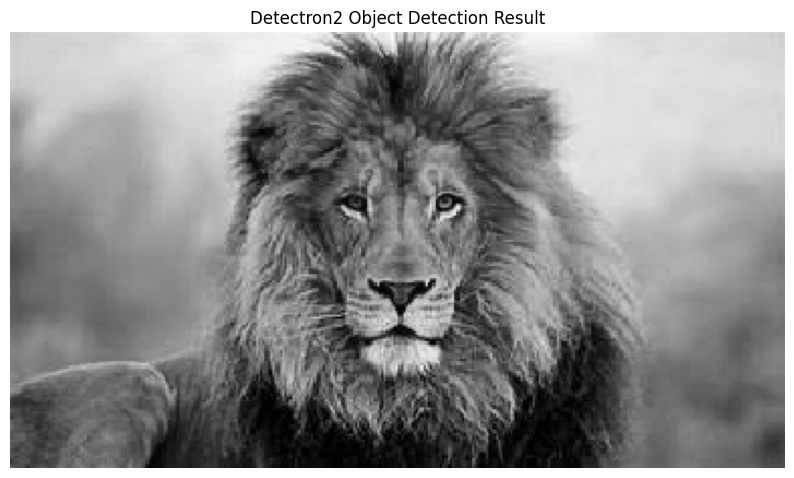

In [52]:
# Display result
plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis("off")
plt.title("Detectron2 Object Detection Result")
plt.show()

In [53]:
# --- Step 11: Save output
output_path = os.path.join(os.getcwd(), "inference_result.jpg")
cv2.imwrite(output_path, result)
print(f"✅ Output saved at: {output_path}")

✅ Output saved at: /content/inference_result.jpg


10. : You are assigned to build a wildlife monitoring system to detect and track
different animal species in a forest using Detectron2. Describe the end-to-end pipeline
from data collection to deploying the model, and how you would handle challenges like
occlusion or nighttime detection.

Building a wildlife monitoring system using Detectron2 involves a complete end-to-end pipeline starting from data collection to model deployment. The process begins with collecting data through camera traps placed strategically across the forest to capture images and videos of different animal species. These images, often motion-triggered, are combined with publicly available wildlife datasets such as Snapshot Serengeti to enhance diversity. Once data is gathered, each image is annotated using tools like LabelMe, CVAT, or Labelbox, marking bounding boxes and species labels for every animal detected. The annotations are then converted into the COCO format, which is compatible with Detectron2.

Before training, data preprocessing plays a crucial role. Blurry or duplicate images are filtered out, and data augmentation techniques like flipping, rotation, brightness adjustments, and noise addition are applied to improve model robustness. Special augmentation methods are also used to simulate low-light and occlusion scenarios to help the model handle real-world challenges. The dataset is divided into training, validation, and testing subsets in a 70-20-10 ratio for optimal evaluation.

For model training, a pretrained architecture such as Faster R-CNN or Mask R-CNN (available within Detectron2’s model zoo) is fine-tuned on the wildlife dataset. The configuration file is customized to specify dataset paths, number of animal classes, learning rate, and other hyperparameters. The model is trained using Detectron2’s DefaultTrainer, and performance is assessed through metrics such as mean Average Precision (mAP) and Recall. After satisfactory accuracy is achieved, inference is performed on new images or video frames using the DefaultPredictor to detect animals and visualize the results with bounding boxes or segmentation masks.

To extend the system for video-based monitoring, object tracking algorithms like DeepSORT or ByteTrack can be integrated to assign unique IDs to animals and track their movements across frames. Once the system performs reliably, it can be deployed either on edge devices like Raspberry Pi or NVIDIA Jetson for real-time forest monitoring or through cloud-based platforms using Flask or FastAPI APIs to serve predictions remotely.

Handling challenges like occlusion and nighttime detection requires specific strategies. Occlusion can be mitigated through instance segmentation models such as Mask R-CNN, which can distinguish overlapping animals more effectively. Nighttime detection can be improved using infrared or thermal cameras, and image enhancement techniques like histogram equalization or CLAHE can boost visibility in low-light conditions. To ensure long-term accuracy, active learning can be implemented where misclassified or new-species images are periodically added to the dataset for retraining, allowing the model to evolve continuously. This comprehensive pipeline thus enables efficient, automated, and intelligent wildlife monitoring capable of operating under diverse environmental conditions.